# **Extract Transform Load (ETL)**

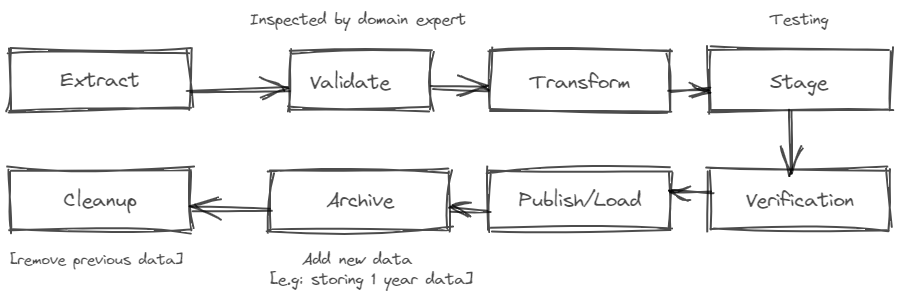

<h2> CSV </h2>

In [ ]:
import csv

with open('test.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['foo', 'bar'])
  writer.writerow(['a', 1])
  writer.writerow(['b', 2])
  writer.writerow(['c', 3])
  writer.writerow(['d', 4])
  writer.writerow(['e', 5])


In [ ]:
! pip install petl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 408 kB 9.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for petl: filename=petl-1.7.11-py3-none-any.whl size=226448 sha256=d012080b4579cbf7cd9b8078c6302fc53acbda2bc17e749501c1b2bed1140a1f
  Stored in directory: /root/.cache/pip/wheels/bc/0f/ae/4f496e580063d9929bd46b9f4d97e8884ece77dc80cd0ccb79
Successfully built petl


In [ ]:
from petl import fromcsv, lookall

In [ ]:
testcsv = fromcsv('test.csv')
lookall(testcsv)

+-----+-----+
| foo | bar |
+=====+=====+
| 'a' | '1' |
+-----+-----+
| 'b' | '2' |
+-----+-----+
| 'c' | '3' |
+-----+-----+
| 'd' | '4' |
+-----+-----+
| 'e' | '5' |
+-----+-----+

<h1> Transform </h1>
<h2> Rename </h2>

In [ ]:
from petl import fromdicts, look, rename
dicts = [{'gen': 'M', 'age': '12'}, 
         {'gen': 'F', 'age': '13'},
         {'gen': 'M', 'age': '40'}]
table1 = fromdicts(dicts)
look(table1)

+-----+------+
| gen | age  |
+=====+======+
| 'M' | '12' |
+-----+------+
| 'F' | '13' |
+-----+------+
| 'M' | '40' |
+-----+------+

In [ ]:
table2 = rename(table1, {'gen': 'Gender', 'age': 'Age'})
look(table2)

+--------+------+
| Gender | Age  |
+========+======+
| 'M'    | '12' |
+--------+------+
| 'F'    | '13' |
+--------+------+
| 'M'    | '40' |
+--------+------+

<h2> Skip Data</h2>

In [ ]:
from petl import skip, pushheader
table3 = skip(table2, 2)
look(table3)

+-----+------+
| F   | 13   |
+=====+======+
| 'M' | '40' |
+-----+------+

# **Data Wraggling**

## Movies Dataset

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
movie_df = pd.read_csv("gdrive/My Drive/data_science/IMDB-Movie-Data.csv", index_col = "Title")
movie_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Check frequency of values (first 5 values)

In [ ]:
movie_df['Director'].value_counts().head(5)

In [ ]:
movie_df.loc['Passengers':'Gold']
# movie_df.iloc[9:21]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Passengers,10,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
Hidden Figures,12,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.27,74.0
Rogue One,13,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
Moana,14,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
Colossal,15,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0
The Secret Life of Pets,16,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
Jason Bourne,18,"Action,Thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,162.16,58.0


In [ ]:
movie_df[movie_df['Year'] == 2012]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Avengers,77,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
The Place Beyond the Pines,136,"Crime,Drama,Thriller",A motorcycle stunt rider turns to robbing bank...,Derek Cianfrance,"Ryan Gosling, Bradley Cooper, Eva Mendes,Craig...",2012,140,7.3,200090,21.38,68.0
Django Unchained,145,"Drama,Western","With the help of a German bounty hunter , a fr...",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,162.80,81.0
...,...,...,...,...,...,...,...,...,...,...,...
The Expendables 2,917,"Action,Adventure,Thriller",Mr. Church reunites the Expendables for what s...,Simon West,"Sylvester Stallone, Liam Hemsworth, Randy Cout...",2012,103,6.6,257395,85.02,51.0
The Master,930,Drama,A Naval veteran arrives home from war unsettle...,Paul Thomas Anderson,"Philip Seymour Hoffman, Joaquin Phoenix,Amy Ad...",2012,144,7.1,112902,16.38,NaN
End of Watch,958,"Crime,Drama,Thriller","Shot documentary-style, this film follows the ...",David Ayer,"Jake Gyllenhaal, Michael Peña, Anna Kendrick, ...",2012,109,7.7,192190,40.98,68.0


In [ ]:
movie_df.rename(columns = {'Runtime (Minutes)': 'Runtime'}, inplace = True)

In [ ]:
movie_df[movie_df['Runtime'] >= 120]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
...,...,...,...,...,...,...,...,...,...,...,...
Queen of Katwe,975,"Biography,Drama,Sport",A Ugandan girl sees her world rapidly change a...,Mira Nair,"Madina Nalwanga, David Oyelowo, Lupita Nyong'o...",2016,124,7.4,6753,8.81,73.0
The Skin I Live In,980,"Drama,Thriller","A brilliant plastic surgeon, haunted by past t...",Pedro Almodóvar,"Antonio Banderas, Elena Anaya, Jan Cornet,Mari...",2011,120,7.6,108772,3.19,70.0
Across the Universe,983,"Drama,Fantasy,Musical",The music of the Beatles and the Vietnam War f...,Julie Taymor,"Evan Rachel Wood, Jim Sturgess, Joe Anderson, ...",2007,133,7.4,95172,24.34,56.0


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime             1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 126.0+ KB


In [ ]:
movie_df[movie_df['Rating'] > 6]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
Take Me Home Tonight,993,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0


In [ ]:
movie_df[(movie_df['Metascore'] > 60) & (movie_df['Rating'] > 6) & (movie_df['Year'] == 2016)]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
...,...,...,...,...,...,...,...,...,...,...,...
The Siege of Jadotville,939,"Action,Drama,Thriller",Irish Commandant Pat Quinlan leads a stand off...,Richie Smyth,"Jamie Dornan, Mark Strong, Jason O'Mara, Micha...",2016,108,7.3,14689,NaN,83.0
Kicks,950,Adventure,Brandon is a 15 year old whose dream is a pair...,Justin Tipping,"Jahking Guillory, Christopher Jordan Wallace,C...",2016,80,6.1,2417,0.15,69.0
Custody,965,Drama,The lives of three women are unexpectedly chan...,James Lapine,"Viola Davis, Hayden Panettiere, Catalina Sandi...",2016,104,6.9,280,NaN,72.0


In [ ]:
movie_df.rename(columns = {'Revenue (Millions)': 'Revenue'}, inplace = True)

List all movies directed by David Ayer or Adam Mckay and having ratings above 6

In [ ]:
movie_df[(movie_df['Director'].isin(['David Ayer', 'Adam Mckay']) ) & (movie_df['Rating'] > 6)]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
Fury,241,"Action,Drama,War",A grizzled tank commander makes tough decision...,David Ayer,"Brad Pitt, Shia LaBeouf, Logan Lerman, Michael...",2014,134,7.6,332234,85.71,64.0
End of Watch,958,"Crime,Drama,Thriller","Shot documentary-style, this film follows the ...",David Ayer,"Jake Gyllenhaal, Michael Peña, Anna Kendrick, ...",2012,109,7.7,192190,40.98,68.0


List the movie which has highest rating in 2016 (Hint: solve in two steps, first filter the data of 2016
and save in another variable and then filter the highest rating from that)

In [ ]:
movies1 = movie_df[movie_df['Year'] == 2016]
max1 = movies1['Rating'].max()
print('Max Rating in 2016:',max1)

Max Rating in 2016: 8.8


List the movie which has highest metascore in 2016 (Hint: solve in two steps, first filter the data of
2016 and save in another variable and then filter the highest metascore from that)

In [ ]:
max2 = movies1['Metascore'].max()
print("Max Metascore in 2016:",max2)

Max Metascore in 2016: 99.0


List the movie which has highest revenue in 2016 (Hint: solve in two steps, first filter the data of
2016 and save in another variable and then filter the highest revenue from that)

In [ ]:
max3 = movies1['Revenue'].max()
print("Max Revenue in 2016:",max3)

Max Revenue in 2016: 532.17


## T20 Dataset

In [ ]:
t20_df = pd.read_csv("gdrive/My Drive/data_science/t20.csv")
t20_df.head()

,Sno,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120,NaN
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113,NaN
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61,NaN
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91,NaN


In [ ]:
t20_df.drop(['Unnamed: 15'] , axis=1 , inplace = True)
t20_df.drop(['Sno'] , axis=1 , inplace = True)

In [ ]:
t20_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91


In [ ]:
t20_df[t20_df['100'] >= 3]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
23,GJ Maxwell (AUS),2012-2019,61,54,9,1576,145*,35.02,985,160,3,7,1,133,81
25,C Munro (NZ),2012-2019,60,57,7,1546,109*,30.92,966,160.04,3,9,5,114,100


In [ ]:
t20_df['HS'] = t20_df['HS'].str.split('*', expand= True)[0]

In [ ]:
t20_df['HS'] = t20_df['HS'].astype({'HS':'int64'})
t20_df[t20_df['HS'] > 50]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94,52.66,1907,138.07,0,24,2,247,71
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,K Birkenstock (NAM),2019-2019,4,2,0,64,59,32,33,193.93,0,1,0,7,4
706,S Dube (INDIA),2019-2019,6,4,2,64,54,32,42,152.38,0,1,0,3,4
741,Muhammad Saleem (),2019-2019,4,4,0,59,52,14.75,54,109.25,0,1,0,5,1
756,A Makesh (KUW),2019-2019,4,2,1,57,57,57,41,139.02,0,1,0,3,4


In [ ]:
t20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  1854 non-null   object
 1   Span    1854 non-null   object
 2   Mat     1854 non-null   int64 
 3   Inns    1854 non-null   int64 
 4   NO      1854 non-null   int64 
 5   Runs    1854 non-null   int64 
 6   HS      1854 non-null   int64 
 7   Ave     1854 non-null   object
 8   BF      1854 non-null   int64 
 9   SR      1854 non-null   object
 10  100     1854 non-null   int64 
 11  50      1854 non-null   int64 
 12  0       1854 non-null   int64 
 13  4s      1854 non-null   int64 
 14  6s      1854 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 217.4+ KB


In [ ]:
t20_df['Ave'].replace('-','0', inplace = True)
t20_df['Ave'] = t20_df['Ave'].astype({'Ave':'float'})

In [ ]:
average = t20_df[t20_df['Ave'] > 35]
print("Total Players: ", average['Ave'].count())

Total Players:  98


# **Graphs**

## Matplotlib

### Line Plot

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv("gdrive/My Drive/data_science/gapminder.csv")
df = data.copy()
df.head()

,Country,Year,life,population,child_mortality,gdp,region
0,Afghanistan,1964,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,35.674,11411022.0,318.1,1187.0,South Asia


In [ ]:
df.columns

Index(['Country', 'Year', 'life', 'population', 'child_mortality', 'gdp',
       'region'],
      dtype='object')

In [ ]:
df.columns = ['country', 'year', 'life_exp', 'pop', 'child_mortality','gdp', 'region']
df.head()

,country,year,life_exp,pop,child_mortality,gdp,region
0,Afghanistan,1964,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,35.674,11411022.0,318.1,1187.0,South Asia


In [ ]:
df_popworld = df.groupby(['year'])['pop'].sum().reset_index()
df_popworld.head()

,year,pop
0,1964,3.268989e+09
1,1965,3.333022e+09
2,1966,3.400742e+09
3,1967,3.471753e+09
4,1968,3.545277e+09


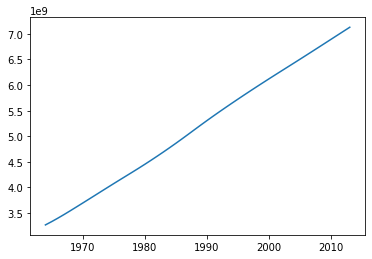

In [ ]:
plt.plot(df_popworld['year'], df_popworld['pop'])
plt.show()

### Scatter Plot

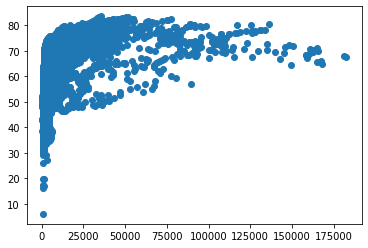

In [ ]:
plt.scatter(df['gdp'],df['life_exp'])
# plt.xscale('log')
plt.show()

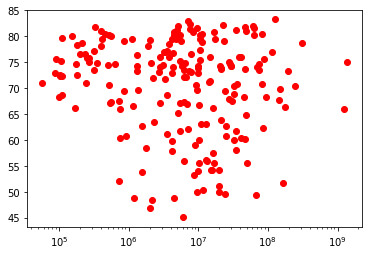

In [ ]:
df_2011 = df[df['year'] == 2011]
plt.scatter(df_2011['pop'], df_2011['life_exp'], c= 'Red')
plt.xscale('log')
plt.show()

### Historgam

In [ ]:
df_1964 = df[df['year'] == 1964]

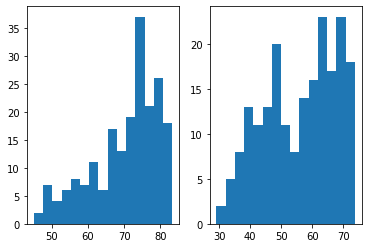

In [ ]:
plt.subplot(1,2,1)
plt.hist(df_2011['life_exp'], bins = 15)
# plt.xlabel('Years')
# plt.ylabel('Life Exp')

plt.subplot(1,2,2)
plt.hist(df_1964['life_exp'], bins = 15)

plt.show()

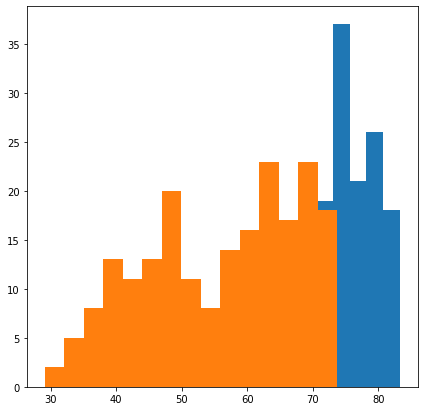

In [ ]:
plt.figure(figsize= (7, 7))
plt.hist(df_2011['life_exp'], bins= 15)
plt.hist(df_1964['life_exp'], bins= 15)
plt.show()

### Additional Customizations

In [ ]:
# World Development in 2011
plt.figure(figsize = (7,7))

plt.scatter(df_2011['gdp'], df_2011['life_exp'])
plt.xscale('log')
plt.title('World Development in 2011')
plt.xlabel('Life Expentancy [in Years]')
plt.ylabel('Growth Per Capita [in USD]')

plt.xticks([1000, 10000, 100000], ['1K','10K', '100k']) # xticks(values, labels) [same can done for ]

plt.show()

NameError: ignored

In [ ]:
df_2011['pop_mill'] = df_2011['pop']/1000000
pop_data = df_2011['pop_mill'] * 2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
col = {'South Asia':'red',
       'Europe & Central Asia':'green',
       'Middle East & North Africa':'blue',
       'Sub-Saharan Africa':'yellow',
       'America':'orange',
       'East Asia & Pacific':'black'}
df_2011['col'] = df_2011['region'].map(col)
df_2011.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,country,year,life_exp,pop,child_mortality,gdp,region,pop_mill,col
47,Afghanistan,2011,60.079,32358260.0,102.3,1695.0,South Asia,32.358260,red
97,Albania,2011,76.979,3215988.0,16.0,9640.0,Europe & Central Asia,3.215988,green
147,Algeria,2011,70.747,35980193.0,26.6,12606.0,Middle East & North Africa,35.980193,blue
197,Angola,2011,51.094,19618432.0,177.3,7094.0,Sub-Saharan Africa,19.618432,yellow
247,Antigua and Barbuda,2011,75.610,89612.0,9.5,19988.0,America,0.089612,orange


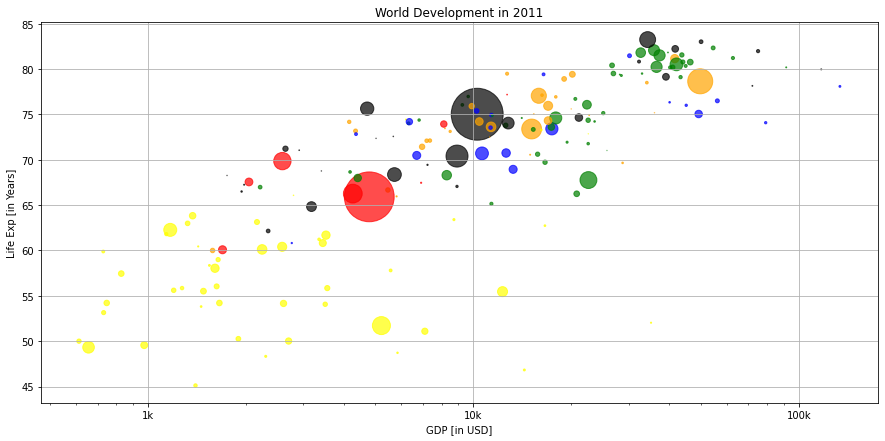

In [ ]:
plt.figure(figsize= (15,7))
plt.scatter(df_2011['gdp'], df_2011['life_exp'], s= pop_data, c= df_2011['col'], alpha= 0.7) # s(size), c(color), alpha(transpancy)

plt.xscale('log')
plt.title('World Development in 2011')
plt.xlabel('GDP [in USD]')
plt.ylabel('Life Exp [in Years]')

plt.xticks([1000, 10000, 100000], ['1k', '10k', '100k'])
plt.grid(True)
plt.show()

## Seaborn

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
nba_df = pd.read_csv('gdrive/My Drive/data_science/nba.csv')
nba_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2-Jun,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,6-Jun,235,Marquette,6796117
2,R.J. Hunter,Boston Celtics,28,SG,22,5-Jun,185,Georgia State,1148640
3,Jonas Jerebko,Boston Celtics,8,PF,29,10-Jun,231,NaN,5000000
4,Amir Johnson,Boston Celtics,90,PF,29,9-Jun,240,NaN,12000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


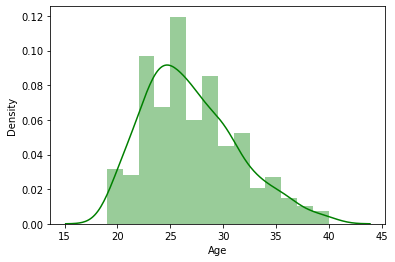

In [ ]:
sns.distplot(nba_df['Age'], color= 'g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


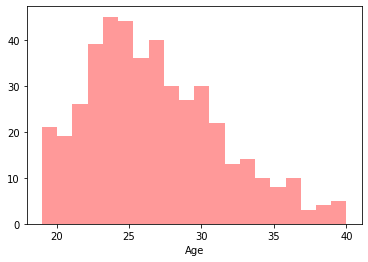

In [ ]:
sns.distplot(nba_df['Age'], color= 'r', bins= 20, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


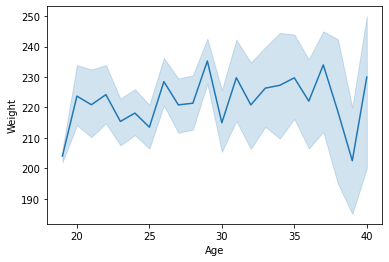

In [ ]:
sns.lineplot(nba_df['Age'], nba_df['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


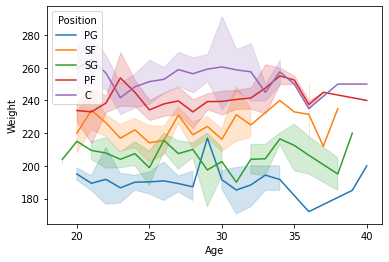

In [ ]:
sns.lineplot(nba_df['Age'], nba_df['Weight'], hue = nba_df["Position"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


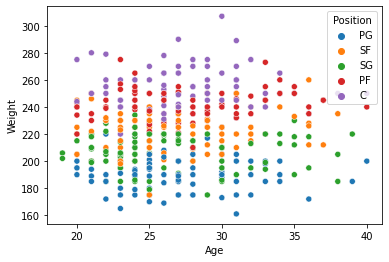

In [ ]:
sns.scatterplot(nba_df['Age'], nba_df['Weight'], hue= nba_df['Position'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


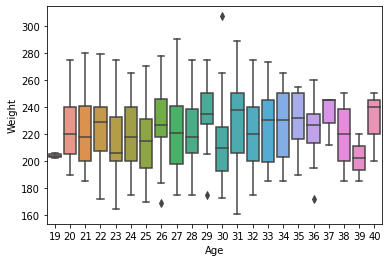

In [ ]:
sns.boxplot(nba_df['Age'], nba_df['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


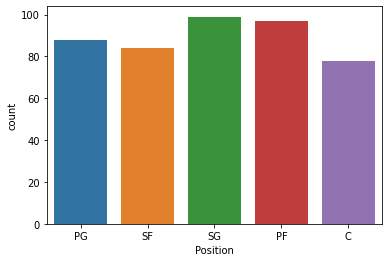

In [ ]:
sns.countplot(nba_df['Position'])